Due to the failure of the last comedy special from SussexBudgetProductions at the box office, we have been tasked with finding the root cause of this issue. 

This is an analysis on the IMDB data which obtain insights on how the next set of funds can be properly invested.
This report explores previous data using the IMDB dataset and also recommends actionable plans 

The dataset provided contains metrics relating to each movie such as : 

Color, director_name, Number of reviews, Duration, director's facebook likes,actor's facebook likes, actor's name, actor facebook likes, gross, genres, movie title,number of voted users, cast's total facebook likes,facenumber in poster,keywords in the plot,imdb link of the movie, Number of user reviews, language, country, content rating, budget, year movie was released. imdb score,the aspect ratio, movie facebook likes.

The dataset was wrangled and modified to include indicators with which we can project fututre sales. Metrics retained include the director's name, genres, country ,movie title, names of the top three actors in the movie, year of the movie, content_rating, imdb_score, movie_facebook_likes, budget, gross, number of critic reviews, duration, language of the movie. 

The key metric being analysed is the gross sales, and the relationships with the other metrics. Metrics such as the aspect ratio of a movie,keywords plot are discarded as they are deemed to have minimal relationship to gross sales. Duration of the movie is also not considered as we are ignoring the role the attention span of a viewer plays on the sales. We also discard facebook likes, as the number of critic reviews is a more encompassing metric and less prone to manipulation.

To begin, I will split the dataset into two. One as an experimental dataset where we explore relationships between the metrics listed above, while the other as a test dataset to confirm our hypothesis. confirming our hypothesis will help reasonable and actionable recommendations.

In [6]:
import pandas as pd

In [7]:
movie_data = "movie_metadata.csv"
import random

movie_data_df = pd.read_csv(movie_data)
movie_data_df = movie_data_df.sample(frac =1.0)
midpoint = len(movie_data_df)//2

#Splitting dataset, one for Exploratory data analysis, one to test hypothesis

dev_list = movie_data_df[:midpoint]   #For Exploratory data analysis.
test_list = movie_data_df[midpoint:]   #To confirm our hypothesis 
dev_list


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
265,Color,Shawn Levy,327.0,127.0,189.0,544.0,Torey Michael Adkins,20000.0,85463309.0,Action|Drama|Sci-Fi|Sport,...,426.0,English,USA,PG-13,110000000.0,2011.0,929.0,7.1,2.35,36000
2423,Color,Jody Hill,190.0,86.0,62.0,59.0,Celia Weston,390.0,23993605.0,Comedy|Crime|Drama,...,248.0,English,USA,R,18000000.0,2009.0,258.0,5.8,2.35,0
2137,Color,David O. Russell,539.0,122.0,737.0,14000.0,Robert De Niro,34000.0,132088910.0,Comedy|Drama|Romance,...,692.0,English,USA,R,21000000.0,2012.0,22000.0,7.8,2.35,117000
4505,Color,Tom Sanchez,1.0,110.0,0.0,0.0,Antonio Arrué,3.0,3830.0,Comedy|Drama,...,1.0,Spanish,USA,NaN,1200000.0,2013.0,2.0,7.2,NaN,75
4538,Color,Bradley Parker,270.0,86.0,18.0,300.0,Ingrid Bolsø Berdal,1000.0,18112929.0,Horror|Mystery|Sci-Fi|Thriller,...,271.0,English,USA,R,1000000.0,2012.0,466.0,5.0,1.85,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,Color,George Nolfi,413.0,106.0,53.0,593.0,Michael Kelly,13000.0,62453315.0,Romance|Sci-Fi|Thriller,...,407.0,English,USA,PG-13,50200000.0,2011.0,963.0,7.1,1.85,36000
3591,Color,Rick Famuyiwa,18.0,106.0,44.0,328.0,Tamala Jones,865.0,25047631.0,Comedy|Drama|Romance,...,50.0,English,USA,R,6000000.0,1999.0,405.0,6.9,1.85,990
801,Color,Harald Zwart,212.0,130.0,91.0,1000.0,Kevin Zegers,5000.0,31165421.0,Fantasy|Horror|Mystery|Romance,...,457.0,English,USA,PG-13,60000000.0,2013.0,2000.0,6.0,2.35,44000
2714,Color,Peter Cattaneo,132.0,102.0,11.0,1000.0,Bradley Cooper,15000.0,6409206.0,Comedy|Music,...,104.0,English,USA,PG-13,15000000.0,2008.0,14000.0,6.2,1.85,0


In [8]:
#Selecting Columns of interest 

modified_dev_list = dev_list[['director_name', 'genres','country','movie_title', 'actor_2_name','title_year', 'actor_3_name', 'content_rating','imdb_score', 'movie_facebook_likes','budget', 'gross','num_critic_for_reviews', 'duration', 'language']]
modified_dev_list.sort_values( by = 'gross', ascending= True)
modified_dev_list

,director_name,genres,country,movie_title,actor_2_name,title_year,actor_3_name,content_rating,imdb_score,movie_facebook_likes,budget,gross,num_critic_for_reviews,duration,language
265,Shawn Levy,Action|Drama|Sci-Fi|Sport,USA,Real Steel,Torey Michael Adkins,2011.0,Olga Fonda,PG-13,7.1,36000,110000000.0,85463309.0,327.0,127.0,English
2423,Jody Hill,Comedy|Crime|Drama,USA,Observe and Report,Celia Weston,2009.0,Dan Bakkedahl,R,5.8,0,18000000.0,23993605.0,190.0,86.0,English
2137,David O. Russell,Comedy|Drama|Romance,USA,Silver Linings Playbook,Robert De Niro,2012.0,Bradley Cooper,R,7.8,117000,21000000.0,132088910.0,539.0,122.0,English
4505,Tom Sanchez,Comedy|Drama,USA,The Knife of Don Juan,Antonio Arrué,2013.0,Juan Carlos Montoya,NaN,7.2,75,1200000.0,3830.0,1.0,110.0,Spanish
4538,Bradley Parker,Horror|Mystery|Sci-Fi|Thriller,USA,Chernobyl Diaries,Ingrid Bolsø Berdal,2012.0,Jonathan Sadowski,R,5.0,24000,1000000.0,18112929.0,270.0,86.0,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,George Nolfi,Romance|Sci-Fi|Thriller,USA,The Adjustment Bureau,Michael Kelly,2011.0,Jon Stewart,PG-13,7.1,36000,50200000.0,62453315.0,413.0,106.0,English
3591,Rick Famuyiwa,Comedy|Drama|Romance,USA,The Wood,Tamala Jones,1999.0,Richard T. Jones,R,6.9,990,6000000.0,25047631.0,18.0,106.0,English
801,Harald Zwart,Fantasy|Horror|Mystery|Romance,USA,The Mortal Instruments: City of Bones,Kevin Zegers,2013.0,CCH Pounder,PG-13,6.0,44000,60000000.0,31165421.0,212.0,130.0,English
2714,Peter Cattaneo,Comedy|Music,USA,The Rocker,Bradley Cooper,2008.0,Josh Gad,PG-13,6.2,0,15000000.0,6409206.0,132.0,102.0,English


In [9]:
#Analysing particular columns such as duration, director_name, num_critic_for_reviews_, Actor_2_name, content_rating,country, content_rating, imdb_score, movie_facebook_likes

#columns such as movie_facebook_likes,imdb_score,gross,num_user_for_reviews are lagging indicators and dependent variables. (describe lagging indicators) 
# columns such as budget, actor_name, country are leading indicators
# Check relationship with EDAs

The relationship between gross sales and imdb_score is examined. Content rating and genres are also analysed as it helps us figure out which niche to target for our next movie at  SussexBudgetProductions. 

The gross sales is the major value being analysed, thus examination of the value helps arrive at a reasonable projection.

Examination of the gross sales

<AxesSubplot:>

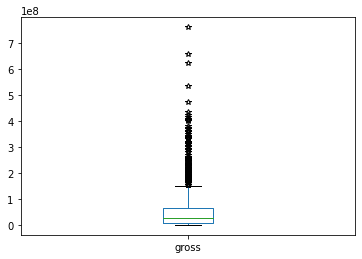

In [11]:
modified_dev_list['gross'].plot(kind = 'box', sym = '*', whis = 1.5)

As it can be seen above, the chart of the gross plot is extremely positively skewed with a lot of outliers. 

This means the gross sales of movie datasets is not normally distributed and using central tendency measures such as mean,mode and median to obtain a threshold may be misleading.

Gross sales vs Content rating 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'R'),
  Text(2, 0, 'Unrated'),
  Text(3, 0, 'PG'),
  Text(4, 0, 'G'),
  Text(5, 0, 'TV-MA'),
  Text(6, 0, 'Not Rated'),
  Text(7, 0, 'Approved'),
  Text(8, 0, 'GP'),
  Text(9, 0, 'TV-G'),
  Text(10, 0, 'TV-14'),
  Text(11, 0, 'X'),
  Text(12, 0, 'Passed'),
  Text(13, 0, 'TV-PG'),
  Text(14, 0, 'NC-17'),
  Text(15, 0, 'TV-Y'),
  Text(16, 0, 'M')])

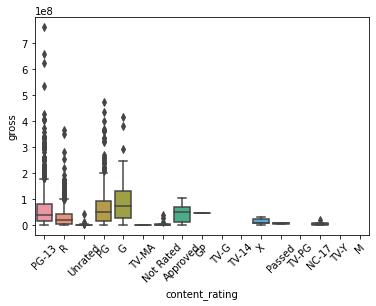

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#Checking the relationship between the content rating and gross 
ax1 = sns.boxplot(y = modified_dev_list['gross'].dropna(), x = modified_dev_list['content_rating'].dropna(),)
plt.xticks(rotation = 45 )

Above is a box-plot of the gross against the content_rating. This chart helps visualise the statistical details of each content rating group against the gross. ( Outliers are shown with the symbol *.)

It can be seen that gross sales beating projection, with a lot of outlier values is a prevalent thing in the 'R', 'PG-13', and 'PG' group. It can also be seen that in the 'G' content rating category that the mean of gross sales surpasses other categories, although with less outliers.



Movie count vs content type

Text(0, 0.5, 'count')

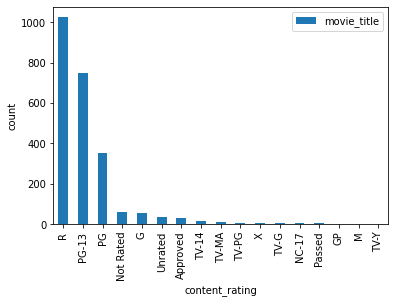

In [12]:
#Checking the amount of movies in the content_rating categories
content_rating_df = modified_dev_list[['movie_title','content_rating']].dropna()
count_content_rating_df = content_rating_df.groupby('content_rating').count().sort_values(by = 'movie_title', ascending = False)
count_content_rating_df.plot(kind = 'bar')
plt.ylabel('count')
plt.title('Movie count vs content type')

Above is also a chart showing the the count of movies in each content rating category. It can be seen that the categories "R","PG-13","PG" have a higher count of movies. This possibly explains the reason for high number outliers. 

A point worthy of note is the low count of movies in the "G" category and the high average gross sale within this category.

Gross sales vs Country of Production

Text(0, 0.5, 'gross')

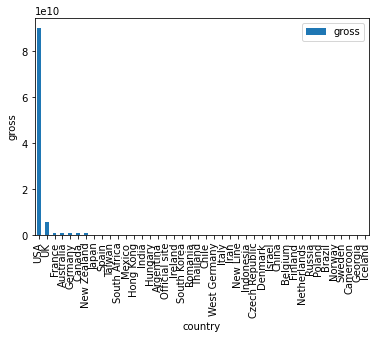

In [13]:
#Checking the amount of movies in the content_rating categories
gross_df = modified_dev_list[['country','gross']].dropna()
gross_df = gross_df.groupby('country').sum().sort_values(by = 'gross', ascending = False)
gross_df.plot(kind = 'bar')
plt.ylabel('gross')

Above is a chart that shows the gross sales, by country of production. 

It shows that majority of the movies are produced in the United States of America, followed by United Kingdom. It does not provide more information on which countries are responsible for the gross sale of this products

Budget Breakdown

In [14]:
modified_dev_list['budget'].describe()

count    2.264000e+03
mean     4.412635e+07
std      2.836402e+08
min      2.180000e+02
25%      6.000000e+06
50%      2.000000e+07
75%      4.500000e+07
max      1.221550e+10
Name: budget, dtype: float64

Above is a breakdown of the budget statistics. It shows a maximum budget of around 12 billion, a minimum of 218 and a mean of 44 million. Further exploration is performed(scatterplot shown below) to examine the relationship between gross sales and budget

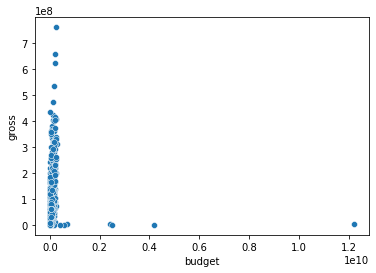

In [17]:
#Check relationship between gross and budget of movies
ax1 = sns.scatterplot(x = modified_dev_list['budget'], y = modified_dev_list['gross'])
ax1.title("Gross vs Budget")

The chart above shows the relationship between the budget and gross sales of a movie. 

From this chart, it can be seen that there exists no correlation between the budget of a movie and the gross sale of the movie. 

We can not conclude on this just yet, and this is an hypothesis which is yet to be verified.

To verify our hypothesis about the correlation between the budget of a movie and the gross value of sales, we perform a correlation test  on the test data using the pearman's and spearman's correlation test. Using a significance level of 5%, corresponding to a p-value of 0.05 as a standard. The p-value/significance level is the percentage that the occurence in your sample is by chance, thus a significance level of 5% shows that 5% of the happenings in our sample is by chance.

Based on this, we make two hypotheses- Null hypothesis,H0, and Alternative hypothesis,H1, which will be verified based on how the p-value from the test data compares with our standard of 0.05

Null Hypothesis,H0 : If p_value(test data) is less than 0.05. We accept that there's no correlation between the gross sales of a movie and the budget.
Alternative Hypothesis, H1 :If p_value(test data) is greater than 0.05 We reject our null hypothesis, thus accepting there's a correlation between the gross sales of a movie and the budget.



In [30]:
import scipy.stats
test_list_df = pd.DataFrame(test_list)

new_test_list_df = test_list_df.sort_values(by= 'gross', ascending= False).dropna()


pearson_corr, pearson_p_value = scipy.stats.pearsonr(new_test_list_df['gross'], new_test_list_df['budget'])
spearman_corr, spearman_p_value = scipy.stats.spearmanr(new_test_list_df['gross'], new_test_list_df['budget'])

print(f"The pearson correlation coefficient between the gross and budget is {pearson_corr} while the p_value is {pearson_p_value}")
print(f"The spearman correlation coefficient between the gross and budget is {spearman_corr} while the p_value is {spearman_p_value}")


The pearson correlation coefficient between the gross and budget is 0.33956580451015383 while the p_value is 4.913568039563872e-52
The spearman correlation coefficient between the gross and budget is 0.6362486102843073 while the p_value is 3.3324560674751762e-214


From the scientific calculations above, it can be seen that the p_value of both the pearson and spearman's test, corresponding to 3.65 x 10^-16 and 1.254 x 10^-203 are both less than 0.05. 

Thus we reject our null hypothesis, and conclude that the relationship between the gross sales of a movie and the budget is statistically significant.

In [15]:
import numpy as np
#Using the top 75 percentile of the dev_test to determine characteristics of our next movie,  by examining the top 75, we can assess the predominant features

imdb_score = modified_dev_list['imdb_score']
gross = modified_dev_list['gross'].dropna()

imdb_75 = np.percentile(list(imdb_score), 75)
gross_75 = np.percentile(list(gross), 75)
gross_25 = np.percentile(list(gross), 25)

summary_statistics = list(gross.describe())

#Format output to be easily readable
print (f"Here are the statistics of the gross sales in the development dataset :  \nCount is {summary_statistics[0]}, \nMean is {summary_statistics[1]}, \nstandard_deviation value is {summary_statistics[2]}, \nMinimum is {summary_statistics[3]}, \n25th percentile is {summary_statistics[4]}, \n50th percentile is {summary_statistics[5]}, and \n75th percentile is {summary_statistics[6]}, \nMaximum value is {summary_statistics[7]}")

Here are the statistics of the gross sales in the development dataset :  
Count is 2072.0, 
Mean is 48937112.04584942, 
standard_deviation value is 69258775.91409169, 
mininmumn is 721.0, 
25th percentile is 5539594.0, 
50th percentile is 26262461.5, and 
75th percentile is 63994570.25, 
Maximum value is 760505847.0


In the same way, we make a statistical analysis of the gross, to know the average gross sales per movie, the 25th percentile, the 75th percentile. This will enable us make a reasonable projection for our next movie at SussexBudgetProductions. 

THE AVERAGE GROSS SALES IS  48,607,720
THE 75TH PERCENTILE IS 62,361,151

To enable us make a close estimate of projection, we need to check if there exists a correlation between the budget of a movie and the gross sales

Other relationships between gross sales and Underlying factors can be seen below. 

<AxesSubplot:xlabel='title_year'>

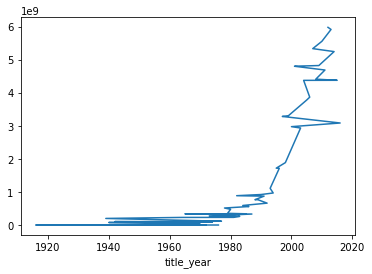

In [18]:
#Trend line to show gross over the years
modified_dev_list.groupby('title_year')['gross'].sum().sort_values(ascending = False).plot(kind = 'line')


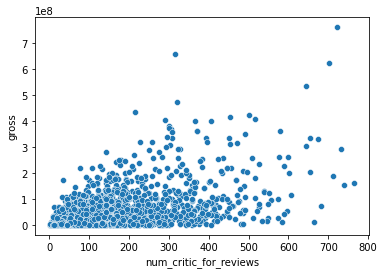

In [19]:
#Check relationship between gross and number of critic reviews
ax1 = sns.scatterplot(x = modified_dev_list['num_critic_for_reviews'], y = modified_dev_list['gross'])

1st chart above shows the relationship between the title_year and gross sales. It can be seen to group exponential over a period of 20 years up until 2000, where it has staggered back and forth. This can be attributed to less friction between the viewer and TV show with the advent of online streams and other experience shaping platforms.

2nd chart above is a scatterplot which shows the distribution of the number of critic reviews with gross sales. It shows a pattern that movies with high gross sales are likely to have high number of critic reviews.

Imdb score vs gross sales 

Text(0, 0.5, 'gross')

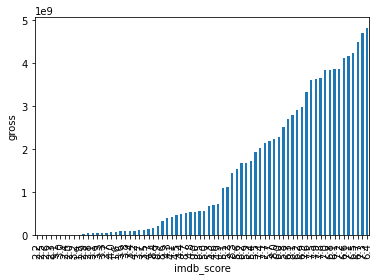

In [20]:
modified_dev_list.groupby('imdb_score')['gross'].sum().sort_values(ascending = True).plot(kind = 'bar')
plt.ylabel("gross")
#Reformat for pleasant viewing

We can see from the above plot that the gross sale of a movie increases with the IMDB SCORE. This is good, as it's a reasonable metric to base our projections on We investigate this further to validate our hypothesis before progressing.

Similar to the correlation test, we check the test data for correlations.

Null Hypothesis,H0 : If p_value(test data) is less than 0.05. We accept that there's no correlation between the gross sales of a movie and the budget.
Alternative Hypothesis, H1 :If p_value(test data) is greater than 0.05 We reject our null hypothesis, thus accepting there's a correlation between the gross sales of a movie and the budget.

In [31]:
import scipy.stats

pearson_corr, pearson_p_value = scipy.stats.pearsonr(new_test_list_df['gross'], new_test_list_df['imdb_score'])
spearman_corr, spearman_p_value = scipy.stats.spearmanr(new_test_list_df['gross'], new_test_list_df['imdb_score'])

print(f"The pearson correlation coefficient between the gross and budget is {pearson_corr} while the p_value is {pearson_p_value}")
print(f"The spearman correlation coefficient between the gross and budget is {spearman_corr} while the p_value is {spearman_p_value}")

The pearson correlation coefficient between the gross and budget is 0.21876928870526613 while the p_value is 7.732856207383963e-22
The spearman correlation coefficient between the gross and budget is 0.10502853147271352 while the p_value is 4.9435153652537295e-06


From the scientific calculations above, it can be seen that the p_value of both the pearson and spearman's test is less than 0.05

Thus we reject our null hypothesis, and conclude that the relationship between the gross sales of a movie and the budget is statistically significant.

We've verified the relationship between the imdb_score and the gross sales in the developmental dataset and the test dataset and can conclude that the gross sales of our next movie is going to depend on the imdb_score of the next movie.


Now to explore other key nuances in the gross_sale of the movie, we  filter by the imdb_score and examine the genres, the actors involved and the directors to be credited.

Examining Imdb_score

<AxesSubplot:>

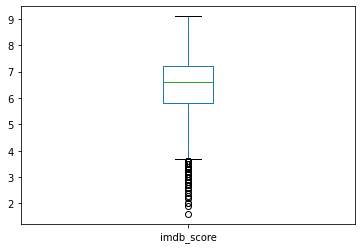

In [21]:
modified_dev_list['imdb_score'].plot(kind = 'box')

In [22]:
modified_dev_list['imdb_score'].describe()

count    2521.000000
mean        6.443395
std         1.112667
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.100000
Name: imdb_score, dtype: float64

The boxplot is negatively skewed, we can use the value of the mean as a reasonable estimate.

Examining the box plot of the modified list, we can use the mean value to arrive at a reasonable threshold to filter suitable actors and directors from. We exclude directors and movies with a score lower than the MEAN which is 6.5

In [32]:
imdb_above_6_5 = modified_dev_list[modified_dev_list['imdb_score'] > 6.5]
imdb_score = imdb_above_6_5[['director_name','actor_2_name','actor_3_name','imdb_score','genres', 'gross', 'movie_title']]

#imdb_score.sort_values('count')
director_movies =imdb_score.loc[:,['director_name','movie_title']].groupby('director_name')

#make a new dataframe indexed by director which stores director and counts of movie titles
movie_counts=director_movies.count().reset_index('director_name')

#change column name to reduce confusion
movie_counts.columns = ['director_name','number of movies']

#sort by appropriate column
movie_counts = movie_counts.sort_values('number of movies', ascending=False)

#put into object containing the top director by name
movie_x_dir = movie_counts[0:10]['director_name']

#take a look at the top of the sorted object with name and number of movies 
movie_counts[0:10]

,director_name,number of movies
488,Martin Scorsese,15
734,Steven Spielberg,11
122,Clint Eastwood,7
638,Richard Linklater,7
748,Tim Burton,7
630,Richard Donner,7
686,Sam Raimi,7
714,Spike Lee,7
599,Peter Jackson,6
660,Robert Zemeckis,6


The above list shows the list of recommended directors for the next movie. These are directors with a number of movies with an IMDB score greater than 6.5

In [ ]:
#Examining the predominant genres in top grossing movies
top_grossing = imdb_above_6_5.sort_values(by = 'gross', ascending = False)

#Converts Pd.series to list
rec_genres = list(top_grossing['genres'])
new_rec_genres = []

#Splits element into individual genre
for element in rec_genres:
    new = element.split('|')
    new_rec_genres += new 
new_rec_genres

#Computes frequency of genres from list
from nltk.probability import FreqDist

genre_distribution = FreqDist(new_rec_genres)
genre_series = pd.Series(genre_distribution)
genre_df = genre_series.to_frame().reset_index()
genre_df.columns = ['Genre', 'Count']
genre_df

,index,0
0,Action,224
1,Adventure,227
2,Fantasy,150
3,Sci-Fi,123
4,Drama,820
5,Romance,290
6,Crime,236
7,Thriller,299
8,Family,123
9,Animation,74


From above, the predominant genres in the top grossing movies are shown above. It can be seen that Drama occured the most - 820 times, followed by Comedy which occured 377 times. Genres such as Thriller,Romance,Adventure,Action,Crime all have close numbers. 

Since the aim is to increase our chances of a top grossing movie, I'd advice a combination of the top grossing genres Drama and Comedy in addition to one of the rest,Adventure,Thriller,Drama, Comedy,Family,Fantasy, Family

Hypotheses that you have designed relating to the overall aim of this assignment and the experiments that you have carried out to test whether they are supported by the data.

- There's no correlation between the budget of a movie and gross value of sales

- There's a relationship between the imdb_score of a movie and the gross value of sales.

This is to confirm the relationship between the imdb_score of a movie and the gross value of sale. i.e If our movie has a high imdb_score, does this mean that the we should expect a gross value sale for our movie?

Our hypothesis is that the imdb_score of a movie and the gross value of sales are related, which means if a movie has a high imdb_score, we should expect a greater than average gross sales. To confirm this, we use a method similar to the one above
.We perform both a pearson's and spearman's test on the data and compare the p_value obtained to the standard of 0.05.

In [ ]:
pearson_corr_1, pearson_p_value_1 = scipy.stats.pearsonr(new_test_list_df['gross'], new_test_list_df['imdb_score'])
spearman_corr_1, spearman_p_value_1 = scipy.stats.spearmanr(new_test_list_df['gross'], new_test_list_df['imdb_score'])

print(f"The pearson correlation coefficient between the gross and imdb_score is {pearson_corr_1} while the p_value is {pearson_p_value_1}")
print(f"The spearman correlation coefficient between the gross and imdb_score is {spearman_corr_1} while the p_value is {spearman_p_value_1}")


The pearson correlation coefficient between the gross and budget is 0.22197778961680523 while the p_value is 1.07445058418354e-22
The spearman correlation coefficient between the gross and budget is 0.13920887262093437 while the p_value is 1.0494853438658203e-09


From the scientific calculations above, it can be seen that the p_value of both the pearson and spearman's test, corresponding to 1.07 x 10^-22 and 1.045 x 10^-9 are both less than 0.05. Thus we reject our null hypothesis, and conclude that the relationship between the imdb_score of a movie and the gross value of sales is statistically significant.

This means that if our movie has a high imdb_score, we should expect a corresponding increase in sales.

Movies in the 'PG-13' content rating record the highest average sales per movie.

The third trend noticed in our dev set is that movies in the PG-13 content rating category record the highest average sales per movie. By confirming this hypothesis, we can make
an informed decision on the category to aim our next movie at, this can help inform ideas on movie plots.

To confirm this hypothesis, we perform a T-test on the test_data. Comparing the PG-13 content rating category with other categories.

In [ ]:
import numpy as np

#Calculating mean of each category
test_data_category_sum = dict(new_test_list_df.groupby('content_rating')['gross'].sum())

test_data_category_count = dict(new_test_list_df.groupby('content_rating')['gross'].count())

mean = {}

for a,b,c in zip(test_data_category_sum.keys(), test_data_category_sum.values(), test_data_category_count.values()):
    mean[a] = b/c

mean

{'Approved': 46613440.625,
 'G': 86604731.46666667,
 'GP': 43800000.0,
 'M': 62554450.0,
 'NC-17': 658644.3333333334,
 'Not Rated': 3777736.388888889,
 'PG': 80144358.89438944,
 'PG-13': 71571071.97916667,
 'Passed': 8000000.0,
 'R': 33707142.18682635,
 'Unrated': 961144.2727272727,
 'X': 19775845.333333332}

Actionable recommendations based on the analyses you have conducted.

Based on our analysis above, it can be seen that the performance of our next movie at Sussex Productions doesn't entirely depend on how large our budget is. With a limited budget of 1.5million, we can optimize the spending of this budget by closely examining the genres,directors and actors involved.

- Genres such as Action, Adventure, Fantasy, Sci-Fi have been seen to amasss a lot of sales have been to pique users interest. A mixture of genres can be appealing to wider segments resulting in more sales. Regarding the country of production, movies from the USA have also been seen to amass a lot of sales.

- The presence of directors such as Martin Scorses, steven Spielberg, Woody Allen, Ridley Scott	
Peter Jackson	
Steven Soderbergh
Ron Howard	
Yimou Zhang	
Spike Lee	
Stephen Frears	 have been associated with higher sales of the movie.

- Since a high percentage of sales grouped by content rating comes from the PG-13, PG,R and G. It is advised that the content rating of our next movie should be within these categories to increase the probabilities reaching our gross projections.